In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 生成数据集
def get_data(sample_num=1000):
    """
    拟合函数为
    y = 4*x1*x1 + 9*x2*x2
    :return:
    """
    x1 = np.linspace(0, 9, sample_num)  # 创建0-9的等差数组
    x2 = np.linspace(4, 13, sample_num)
    x = np.concatenate(([x1], [x2]), axis=0).T   # 按第一维重新生成一个新的array
    x = x*x
    y = np.dot(x, np.array([4, 9]).T)   # 矩阵相乘
    return x, y


def shuffle_data(x, y):
    # 随机打乱x，y的数据，并且保持x和y一一对应
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)


def get_splited_data(x, y, ratio):
    shuffle_data(x, y)
    train_size = int (len(x)*ratio)
    train_x = x[:train_size]
    train_y = y[:train_size]
    test_x = x[train_size:]
    test_y = y[train_size:]
    return train_x, train_y, test_x, test_y


# 选择算法，计算梯度
def compute_grad(X,y,batch_size,theta,type):
    row = X.shape[0]
    col = X.shape[1]
    grad = np.ones((col, 1))
    if type == 'FULL':  # 梯度下降法
        h = np.dot(X, theta)
        grad = np.dot(np.transpose(X), h-y)/row
    elif type == 'SGD':  # 随机梯度下降法
        r = np.random.randint(row)  # 从全部样本随机选取一个样本
        h = np.dot(np.array([X[r, :]]), theta)
        grad = np.dot(np.transpose(np.array([X[r, :]])), h - np.array([y[r, :]]))

    elif type == 'MINI':   # Mini-Batch随机梯度下降法
        r = np.random.choice(row,batch_size,replace=False)  # 从全部样本随机选取一个batch的样本
        h = np.dot(X[r,:], theta)
        grad = np.dot(np.transpose(X[r,:]), h - y[r,:]) / batch_size
    else:
        print("NO such gradient dencent Method!")
    # 计算训练loss
    loss = compute_RMSE(X, y, theta)
    return grad, loss


# 权重更新函数，theta为权重，alpha为学习率，grad为梯度
def update_theta(grad,theta,alpha):
    theta = theta - alpha*grad
    return theta


# 使用均方根误差作为代价函数，计算loss
def compute_RMSE(X,y,theta):
    row = X.shape[0]
    hh = np.dot(X, theta)
    RMSE = np.sqrt(np.dot((np.transpose(hh-y)),(hh-y))/(2*row))
    return RMSE

In [2]:
 # 获得数据集，并划分成训练集与测试集
data_x, data_y = get_data()
data_y = np.array(data_y).reshape(-1, 1)
shuffle_data(data_x,data_y)
train_x,train_y,test_x,test_y = get_splited_data(data_x, data_y, ratio=0.8)
print("train:",train_x,train_y)
print(train_x.shape,train_y.shape)
print("test:",test_x,test_y)
print(test_x.shape,test_y.shape)

train: [[ 0.         16.        ]
 [ 0.         16.        ]
 [ 0.         16.        ]
 ...
 [20.29056083 72.32659687]
 [ 8.89221654 48.7480724 ]
 [16.         64.        ]] [[ 144.        ]
 [ 144.        ]
 [ 144.        ]
 [ 144.        ]
 [ 144.        ]
 [ 144.        ]
 [ 145.30151773]
 [ 144.        ]
 [ 145.95544193]
 [ 144.        ]
 [ 144.        ]
 [ 150.5919974 ]
 [ 144.        ]
 [ 144.        ]
 [ 148.59224089]
 [ 144.        ]
 [ 145.95544193]
 [ 145.95544193]
 [ 150.5919974 ]
 [ 144.        ]
 [ 146.61147634]
 [ 144.        ]
 [ 145.30151773]
 [ 149.25671618]
 [ 148.59224089]
 [ 147.26962097]
 [ 150.5919974 ]
 [ 144.        ]
 [ 155.33195358]
 [ 152.61074588]
 [ 155.33195358]
 [ 146.61147634]
 [ 144.        ]
 [ 146.61147634]
 [ 145.95544193]
 [ 149.25671618]
 [ 154.64848632]
 [ 147.26962097]
 [ 149.25671618]
 [ 145.95544193]
 [ 148.59224089]
 [ 157.39501664]
 [ 150.5919974 ]
 [ 148.59224089]
 [ 154.64848632]
 [ 157.39501664]
 [ 150.5919974 ]
 [ 145.95544193]
 [ 158.08

In [3]:
col = data_x.shape[1]  # 数据的列数
theta = np.zeros((col, 1))  # 设置权重初始为0
max_step = 500   # 最大迭代次数
train_loss = []
test_loss = []
train_step = []
test_step = []
loss = 1
step = 0

In [4]:
while loss > 0.01 and step < max_step:

    grad, loss = compute_grad(train_x, train_y, batch_size=50, theta=theta, type='MINI')
    theta = update_theta(grad, theta, alpha=0.001)
    print("step: ", step, "loss:", loss[0][0])

    train_loss.append(loss[0][0])
    train_step.append(step)

    if step % 10 == 0:
        testloss = compute_RMSE(test_x, test_y, theta)
        test_loss.append(testloss[0][0])
        test_step.append(step)

    step += 1   # 迭代步数加1

step:  0 loss: 195.03644521502767
step:  1 loss: 69.08139646349748
step:  2 loss: 12.869381047859955
step:  3 loss: 8.326728344449581
step:  4 loss: 7.740730086598783
step:  5 loss: 6.434620626142699
step:  6 loss: 6.415793574726855
step:  7 loss: 6.35210931544044
step:  8 loss: 6.2921069912664125
step:  9 loss: 6.2687566986980485
step:  10 loss: 6.250949512942902
step:  11 loss: 6.164392304720664
step:  12 loss: 5.987490803912566
step:  13 loss: 6.498004141557402
step:  14 loss: 5.932072417003126
step:  15 loss: 5.8713955067312025
step:  16 loss: 6.428337179473364
step:  17 loss: 5.572883110306564
step:  18 loss: 6.376743360850994
step:  19 loss: 5.481588053988396
step:  20 loss: 6.211107951577206
step:  21 loss: 5.363664470622641
step:  22 loss: 5.395287529686708
step:  23 loss: 5.147999371323336
step:  24 loss: 5.095594998315
step:  25 loss: 5.130879884894711
step:  26 loss: 5.01690494159386
step:  27 loss: 4.984303026108499
step:  28 loss: 4.965000418217638
step:  29 loss: 5.055221

step:  332 loss: 0.20235646112413078
step:  333 loss: 0.20106926960372584
step:  334 loss: 0.19883333566878944
step:  335 loss: 0.19542469008083097
step:  336 loss: 0.20003408105031037
step:  337 loss: 0.20608803865921152
step:  338 loss: 0.1902262619429947
step:  339 loss: 0.18563206898372084
step:  340 loss: 0.18577189624771825
step:  341 loss: 0.18201299183135602
step:  342 loss: 0.17989750201742818
step:  343 loss: 0.18664518971899244
step:  344 loss: 0.17713702571762505
step:  345 loss: 0.17802902933916662
step:  346 loss: 0.1735671096442897
step:  347 loss: 0.1863747663549243
step:  348 loss: 0.1775377182452173
step:  349 loss: 0.1677005351443715
step:  350 loss: 0.16540844428978274
step:  351 loss: 0.17209213825754965
step:  352 loss: 0.1800395601074924
step:  353 loss: 0.18501384656178665
step:  354 loss: 0.1625532794755227
step:  355 loss: 0.1609179803087952
step:  356 loss: 0.1720552841413345
step:  357 loss: 0.16495042944539887
step:  358 loss: 0.1650130110339754
step:  359 

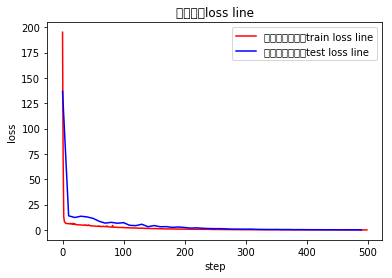

In [6]:
# 画出损失曲线
plt.plot(train_step, train_loss, c='red', label='训练集损失曲线train loss line')
plt.plot(test_step, test_loss, c='blue', label='测试集损失曲线test loss line')
plt.legend(loc='best')
plt.xlabel("step")
plt.ylabel("loss")
plt.title("损失曲线loss line")
plt.show()